# Random Forest

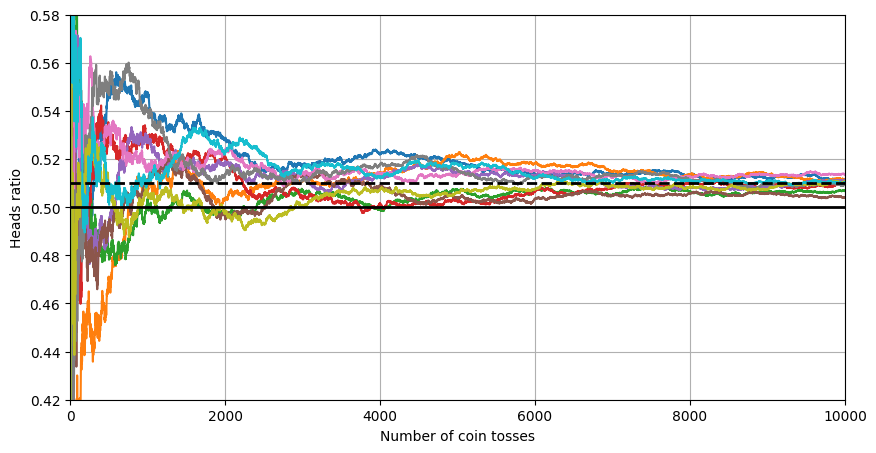

In [1]:
import numpy as np
import matplotlib.pyplot as plt

head_probs = 0.51
np.random.seed(42)

coin_tosses = (np.random.rand(10000, 10) < head_probs).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], 'k--', linewidth=2, label='51%')
plt.plot([0, 10000], [0.5, 0.5], 'k-', linewidth=2, label='50%')
plt.xlabel('Number of coin tosses')
plt.ylabel("Heads ratio")
plt.grid()
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(random_state=42, probability=True)),
        ("dt", DecisionTreeClassifier(max_depth=2)),
    ],
    voting="soft",
)

voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [3]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'{name} = {clf.score(X_test, y_test)}')

lr = 0.864
rf = 0.896
svc = 0.896
dt = 0.896


In [4]:
voting_clf.predict(X_test[:1])

array([1])

In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0]), array([1])]

In [6]:
voting_clf.score(X_test, y_test)

0.92

## Bagging and Pasting 

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    n_jobs=11,
    random_state=42,
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,11
,random_state,42
,verbose,0


### OOB Evaluation

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    max_samples=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [9]:
bag_clf.oob_score_

0.9253333333333333

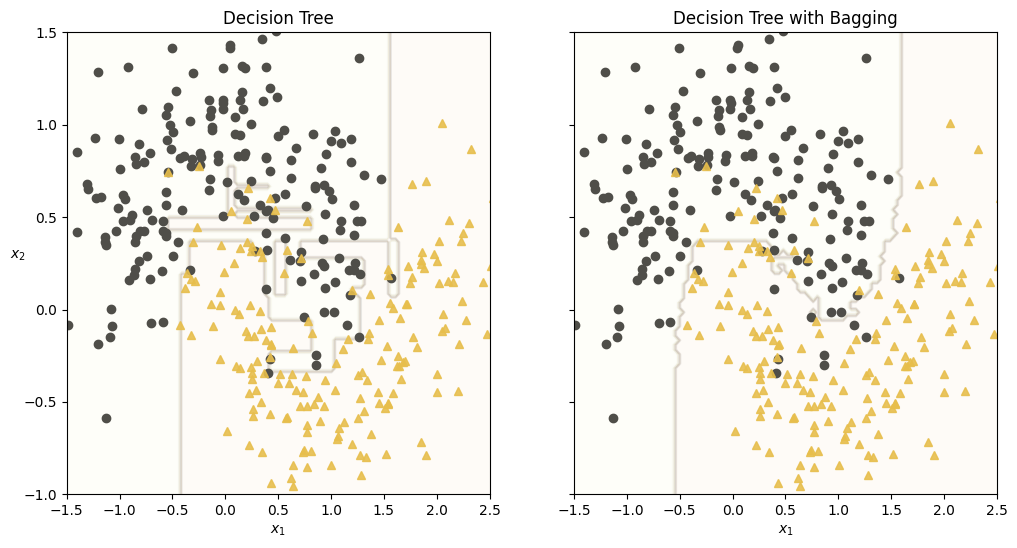

In [10]:
def plot_decision_boundary(clf, X, y, alpha=0.1):
    axes = [-1.5, 2.5, -1.0, 1.5]
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100)
    )

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap="Wistia")
    plt.contour(x1, x2, y_pred, alpha=0.8 * alpha, cmap="Greys")
    colors = ["#4f4e49", "#e7be4ce4"]
    markers = ("o", "^")

    for idx in (0, 1):
        plt.plot(
            X[:, 0][y == idx],
            X[:, 1][y == idx],
            color=colors[idx],
            marker=markers[idx],
            linestyle="none",
        )

    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plt.sca(ax[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(ax[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Tree with Bagging")
plt.ylabel("")

plt.show()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_samples=100,
    n_jobs=-1, 
    random_state=42
)

In [13]:
rnd_clf.fit(X_train, y_train)
rnd_pred_rf = rnd_clf.predict(X_test) 

In [18]:
rnd_pred_rf

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [20]:
accuracy_score(y_test,rnd_pred_rf)

0.92

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(
    n_estimators=500,
    n_jobs=-1, 
    random_state=42
)

extra_clf.fit(X_train, y_train)
extra_clf_pred = extra_clf.predict(X_test)

In [23]:
accuracy_score(y_test, extra_clf_pred)

0.888

### Feature Importance

In [24]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)
